# Homework 2

## Task 1 Regression on Ames Housing Dataset (60 points)

You can load the Ames housing dataset from
http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls

You can find a description of the variables here:
http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

Take note that for categorical variables, NA here does not mean a missing value, but should be
treated as a separate category.

### Task 1.1
Visualize the univariate(单变量的) distribution of each continuous, and the distribution of the target. Do
you notice anything? Is there something that might require special treatment?

In [101]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.impute import SimpleImputer
from sklearn.linear_model import (LinearRegression, Ridge,
                                  Lasso, ElasticNet)
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import (train_test_split, cross_val_score,
                                     GridSearchCV)
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import (StandardScaler, PowerTransformer, 
                                   OneHotEncoder)

%matplotlib inline

In [5]:
_NA_VALUES = {
    "-1.#IND",
    "1.#QNAN",
    "1.#IND",
    "-1.#QNAN",
    "#N/A",
    "N/A",
    "n/a",
    # "NA",
    "<NA>",
    "#NA",
    "NULL",
    "null",
    "NaN",
    "nan",
    "-NaN",
    "-nan",
    "#N/A N/A",
    "",
}
ames_df = pd.read_excel('data/AmesHousing.xls', keep_default_na=False, na_values=_NA_VALUES)
ames_df.head()

# Finding numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = []
for col in ames_df.columns:
    if ames_df[col].dtype in numeric_dtypes:
        if col != 'SalePrice':
            numeric_cols.append(col)

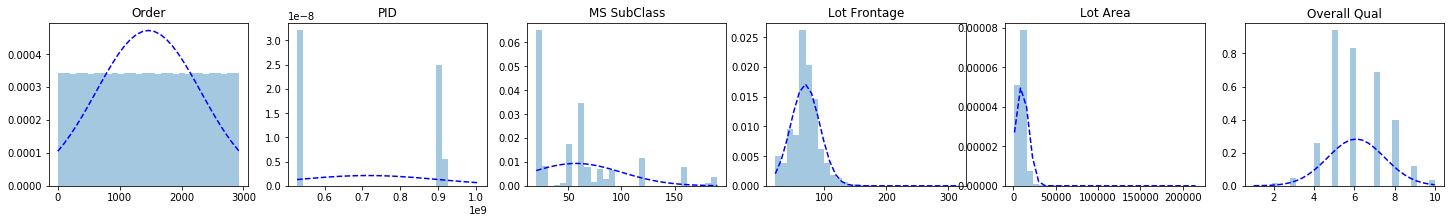

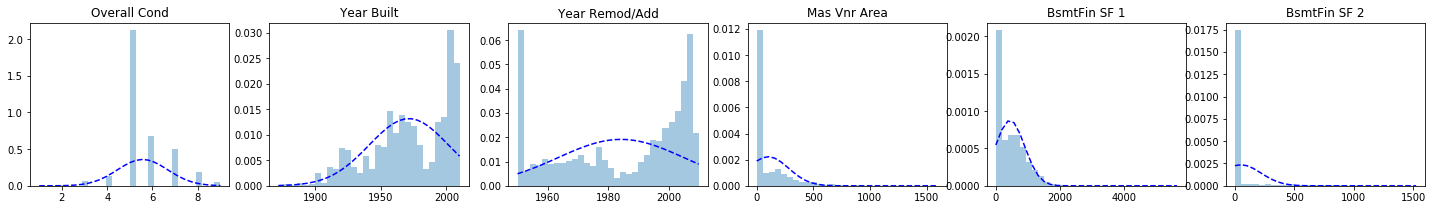

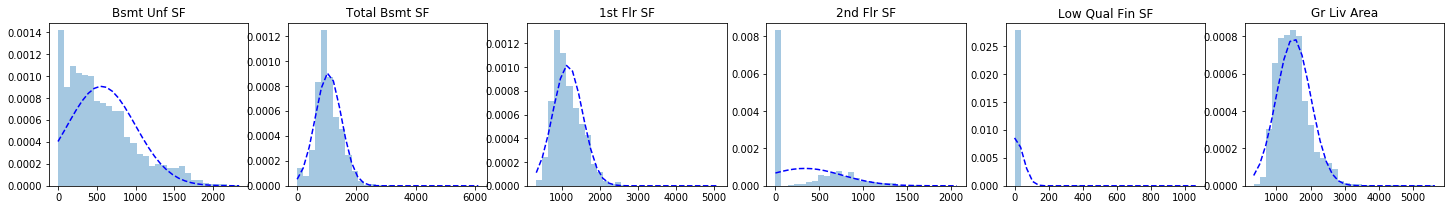

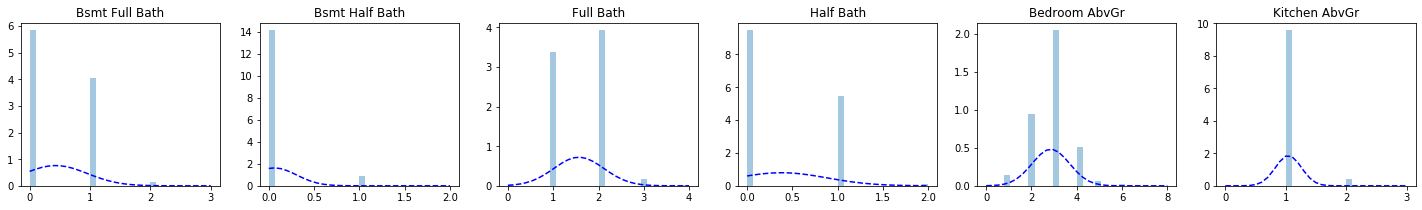

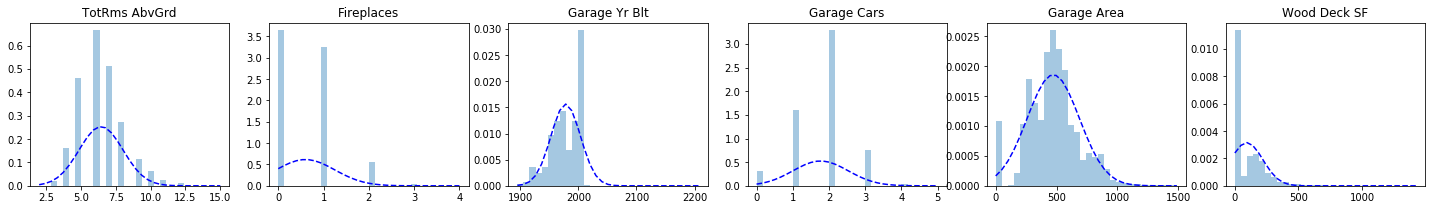

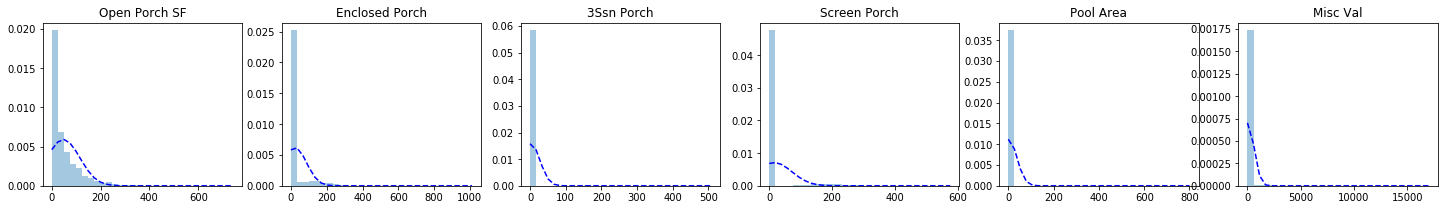

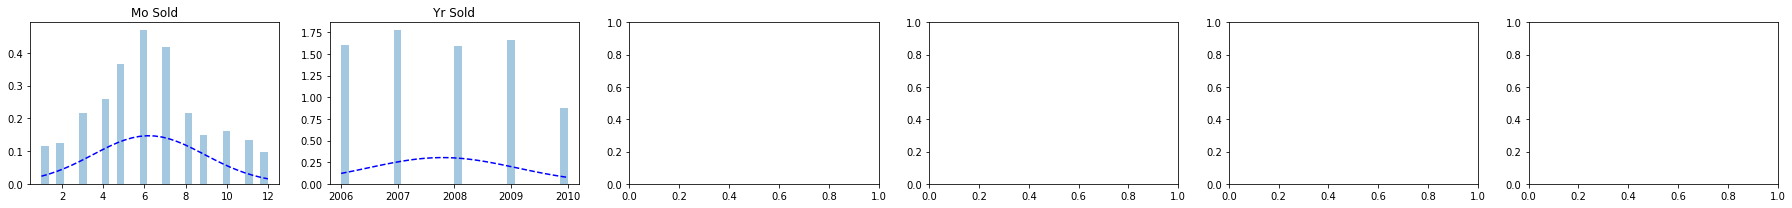

In [16]:
''' Visualize the univariate distribution of each continuous feature. '''
n_cols = 6
n_rows = np.ceil(len(numeric_cols) / n_cols).astype(int)
col_counter = 0
for row_idx in range(n_rows):
    # axes.shape == (n_cols,)
    fig, axes = plt.subplots(1, n_cols, figsize=(25, 3))
    for col_idx in range(n_cols):
        col_name = numeric_cols[col_counter]
        
        # The following code is based on https://zhuanlan.zhihu.com/p/32941723.
        x = ames_df[col_name]
        mu =np.mean(x)
        sigma =np.std(x)

        n, bins, patches = axes[col_idx].hist(x, bins=30, density=True, alpha=0.4)
        y = norm.pdf(bins, mu, sigma)
        axes[col_idx].plot(bins, y, 'b--')
        
        axes[col_idx].set_title(col_name)
        col_counter += 1
        if col_counter == len(numeric_cols):
            break
plt.tight_layout()

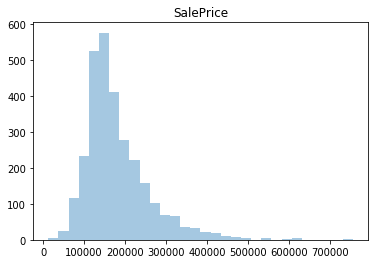

In [44]:
''' Visualize the univariate distribution of target. '''
target = ames_df['SalePrice']
plt.hist(target, bins=30, alpha=0.4)
plt.title('SalePrice')
plt.show()

/home/wangchu/anaconda3/envs/machine_learning/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/wangchu/anaconda3/envs/machine_learning/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


Visualization after applying PowerTransformer: 


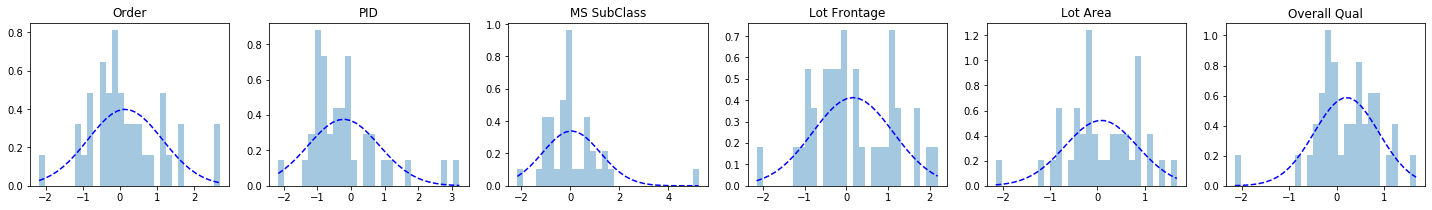

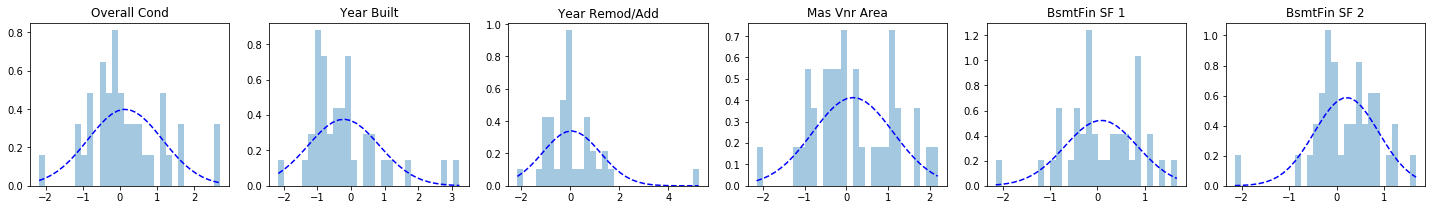

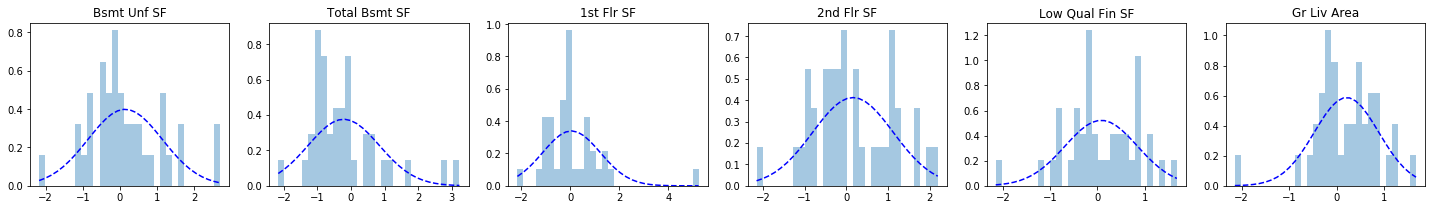

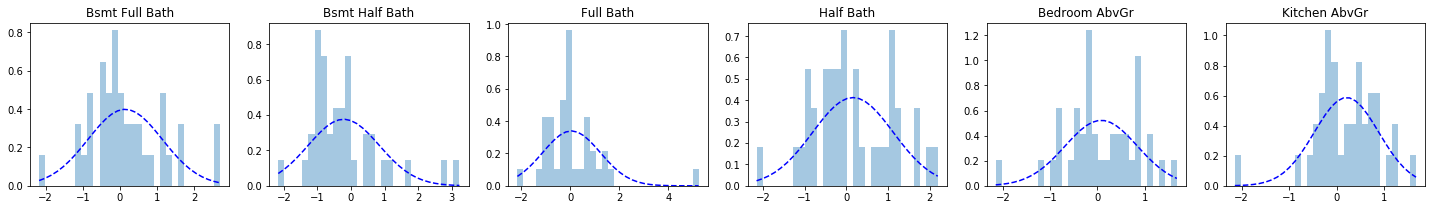

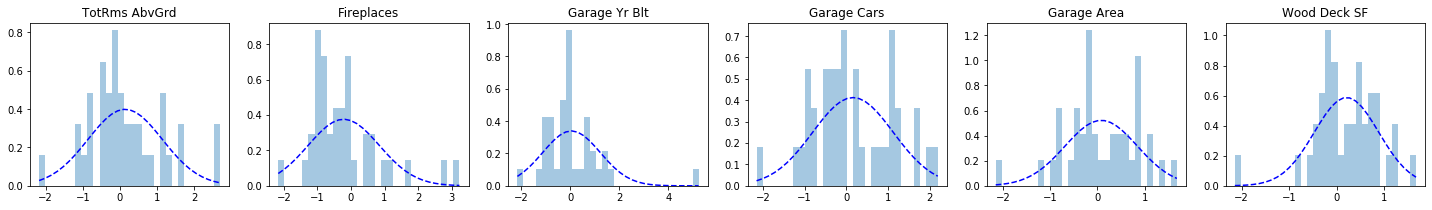

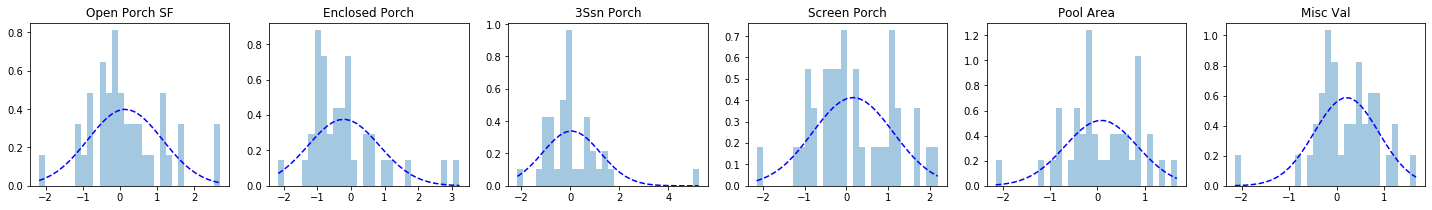

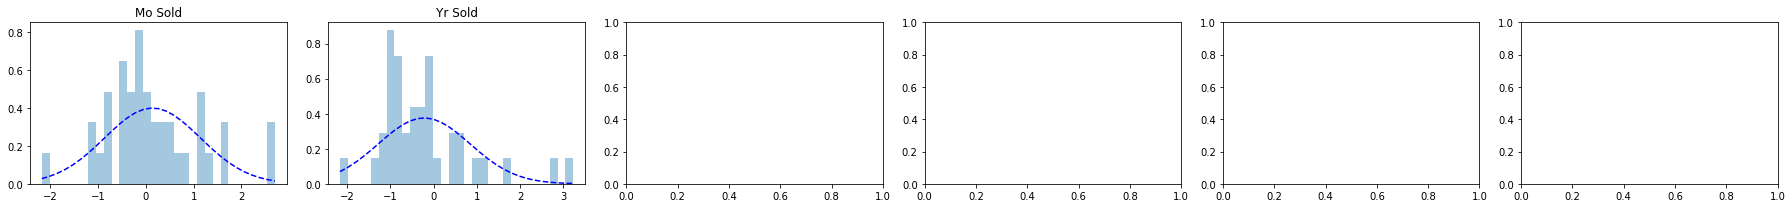

In [21]:
''' After box-cox scaling, visualize the univariate distribution of each continuous feature. ''' 
numeric_features = ames_df.loc[:, numeric_cols]
        
# Apply StandardScaling.
power_scaler = PowerTransformer()
power_scaler.fit(numeric_features)
scaled = power_scaler.transform(numeric_features)

n_cols = 6
n_rows = np.ceil(len(numeric_cols) / n_cols).astype(int)
col_counter = 0

print("Visualization after applying PowerTransformer: ")
for row_idx in range(n_rows):
    # axes.shape == (n_cols,)
    fig, axes = plt.subplots(1, n_cols, figsize=(25, 3))
    for col_idx in range(n_cols):
        col_name = numeric_cols[col_counter]
        
        # The following code is based on https://zhuanlan.zhihu.com/p/32941723.
        x = scaled[col_idx]

        mu =np.mean(x)
        sigma =np.std(x)

        n, bins, patches = axes[col_idx].hist(x, bins=30, density=True, alpha=0.4)
        y = norm.pdf(bins, mu, sigma)
        axes[col_idx].plot(bins, y, 'b--')
        
        axes[col_idx].set_title(col_name)
        col_counter += 1
        if col_counter == len(numeric_cols):
            break
plt.tight_layout()

Visualization after applying StandardScaling: 


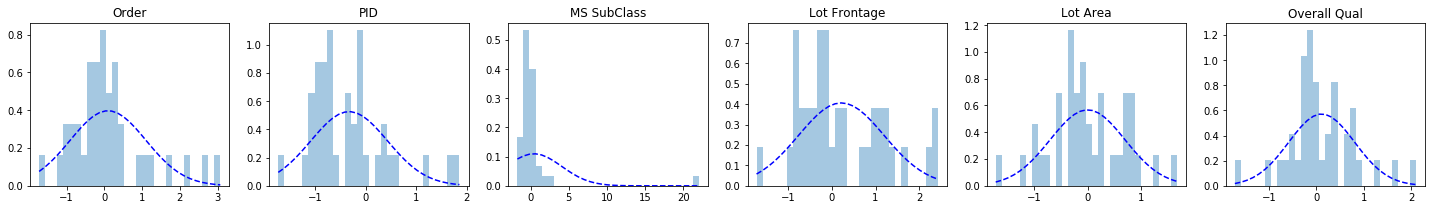

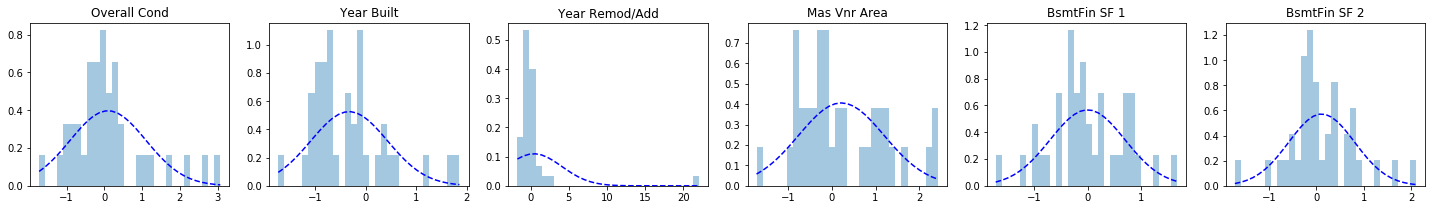

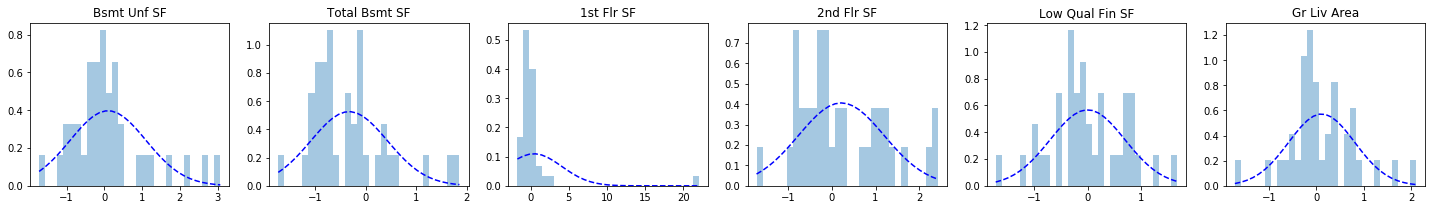

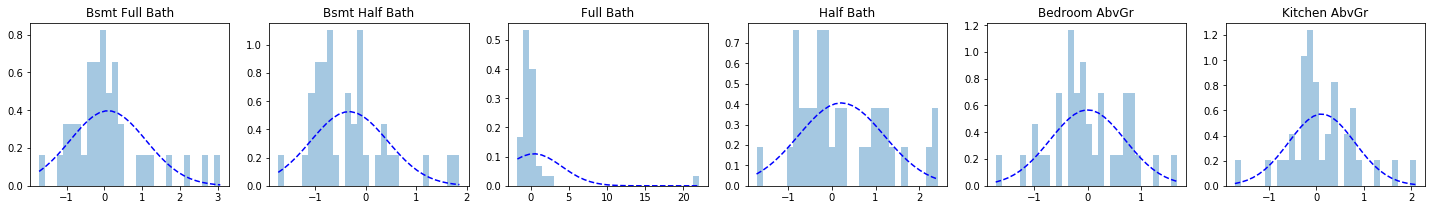

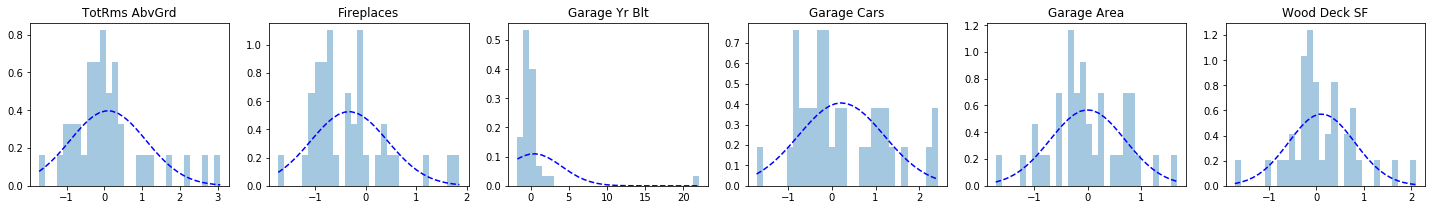

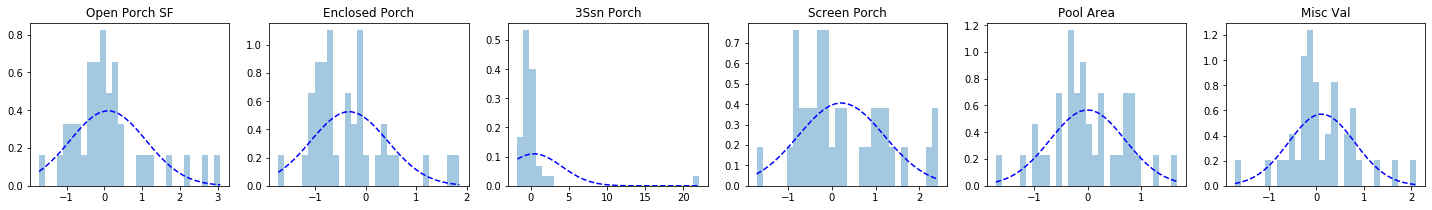

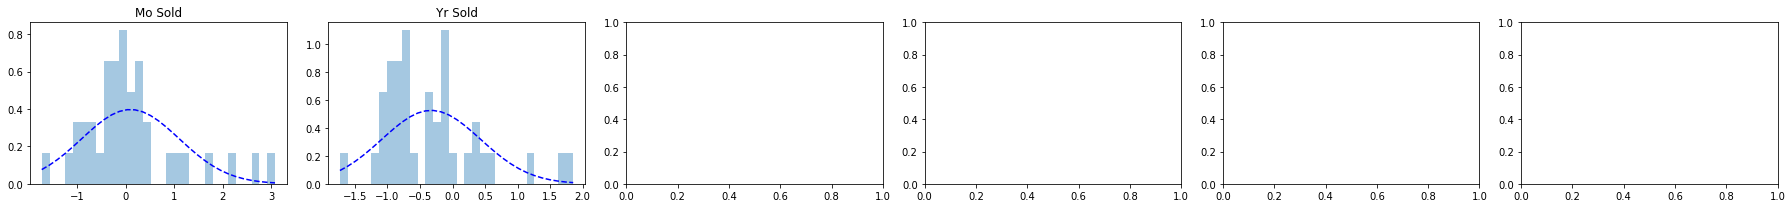

In [22]:
''' After standard scaling, visualize the univariate distribution of each continuous feature. ''' 
numeric_features = ames_df.loc[:, numeric_cols]
        
# Apply StandardScaling.
standard_scaler = StandardScaler()
standard_scaler.fit(numeric_features)
scaled = standard_scaler.transform(numeric_features)

n_cols = 6
n_rows = np.ceil(len(numeric_cols) / n_cols).astype(int)
col_counter = 0

print("Visualization after applying StandardScaling: ")
for row_idx in range(n_rows):
    # axes.shape == (n_cols,)
    fig, axes = plt.subplots(1, n_cols, figsize=(25, 3))
    for col_idx in range(n_cols):
        col_name = numeric_cols[col_counter]
        
        # The following code is based on https://zhuanlan.zhihu.com/p/32941723.
        x = scaled[col_idx]

        mu =np.mean(x)
        sigma =np.std(x)

        n, bins, patches = axes[col_idx].hist(x, bins=30, density=True, alpha=0.4)
        y = norm.pdf(bins, mu, sigma)
        axes[col_idx].plot(bins, y, 'b--')
        
        axes[col_idx].set_title(col_name)
        col_counter += 1
        if col_counter == len(numeric_cols):
            break
plt.tight_layout()

### Task 1.2
Visualize the dependency of the target on each continuous feature(2d scatter plot)

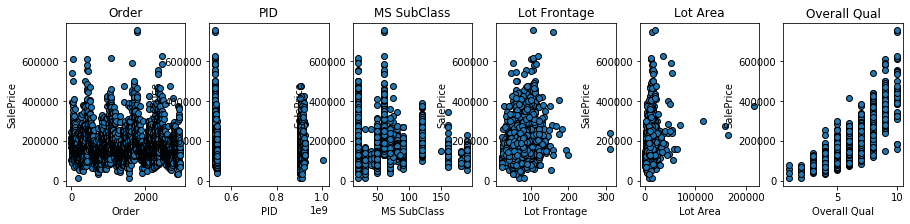

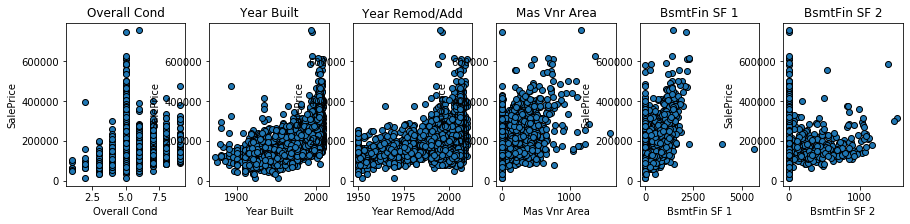

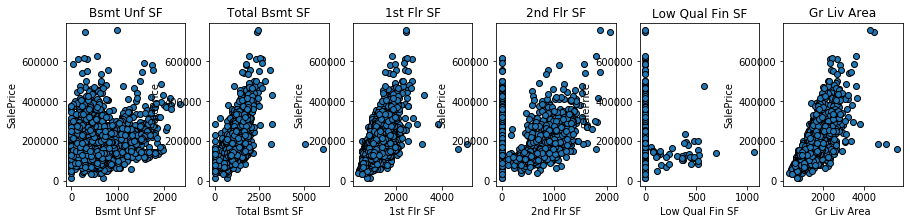

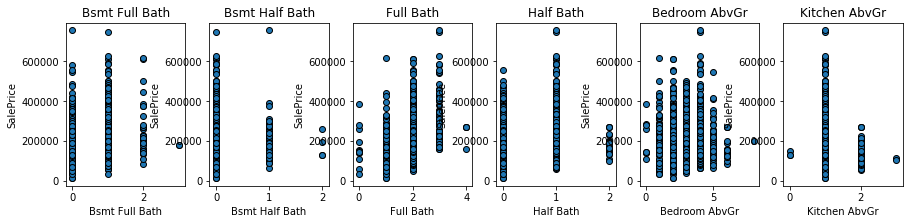

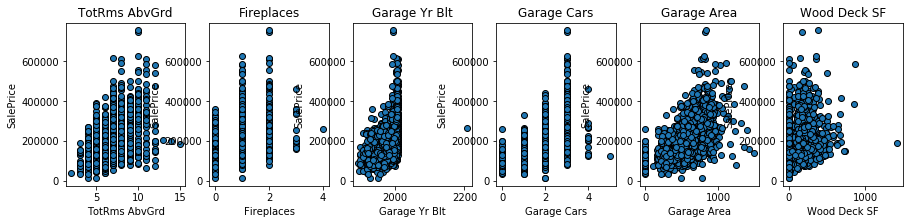

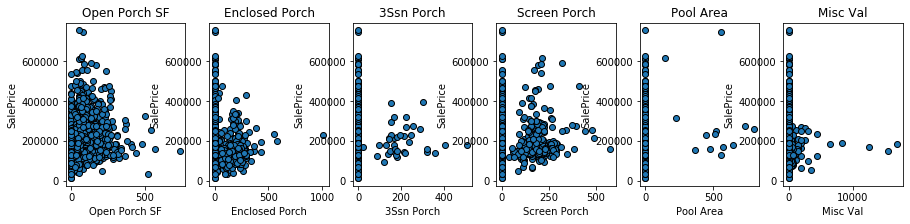

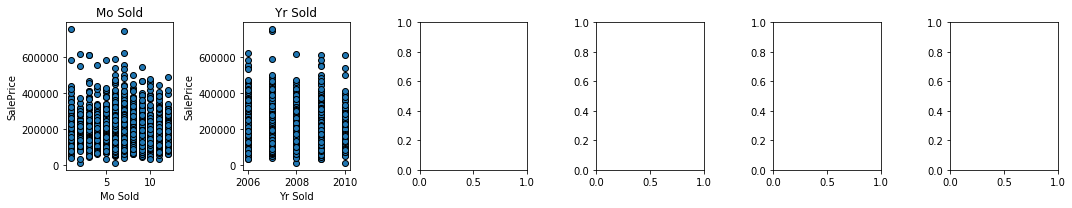

In [23]:
''' Visualize the dependency of each continuous feature. '''
col_counter = 0
for row_idx in range(n_rows):
    # axes.shape == (n_cols,)
    fig, axes = plt.subplots(1, n_cols, figsize=(15, 3))
    for col_idx in range(n_cols):
        col_name = numeric_cols[col_counter]
        
        axes[col_idx].scatter(ames_df[col_name], ames_df['SalePrice'], cmap='bwr', edgecolor='k')
        axes[col_idx].set_title(col_name)
        axes[col_idx].set_xlabel(col_name)
        axes[col_idx].set_ylabel('SalePrice')
        
        col_counter += 1
        if col_counter == len(numeric_cols):
            break
plt.tight_layout()

### Task 1.3
Split data in training and test set. Do not use the test-set unless for a final evaluation in 1.6.
For each categorical variable, cross-validate a Linear Regression model using just this variable
(one-hot-encoded). Visualize the relationship of the categorical variables that provide the best
R^2 value with the target.

ames_df.shape: (2930, 82)
X.shape: (2930, 81)
y.shape: (2930,)


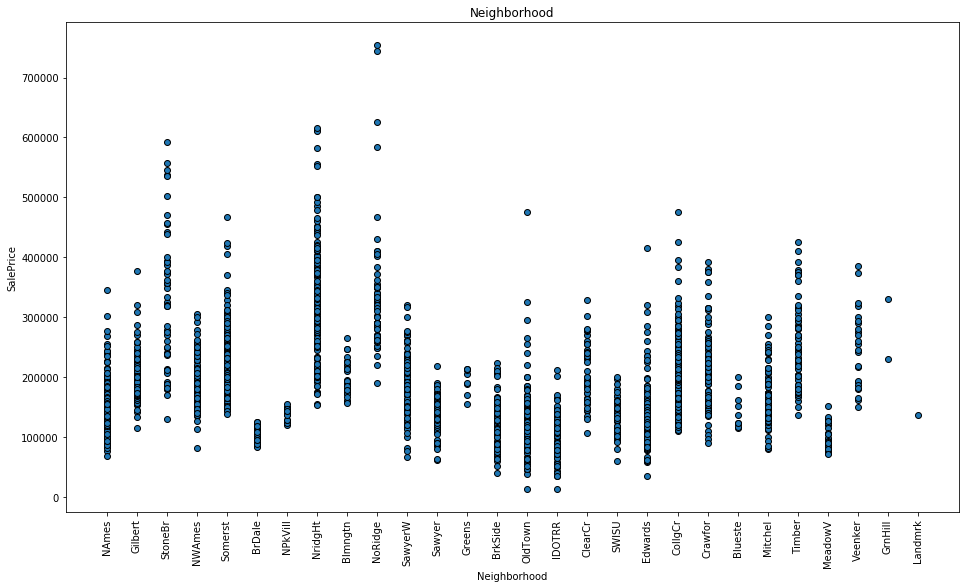

In [44]:
X = ames_df.drop(['SalePrice'], axis=1)
y = ames_df['SalePrice']
print("ames_df.shape: {}\nX.shape: {}\ny.shape: {}".format(ames_df.shape, X.shape, y.shape))

# Split data.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# OneHotEncoder + ColumnTransformer.
categorical = X_train.dtypes == object
categorical_columns = categorical.index[categorical]
X_train_cat = X_train[categorical_columns]

# Imputation missing values for categorical variables.
X_train_cat_imputed = SimpleImputer(strategy='most_frequent').fit_transform(X_train_cat)

scores_list = []
# For each categorical variable, cross-validate a Linear 
# Regression model using just this variable (one-hot-encoded).
for idx, X_train_cat_col in enumerate(X_train_cat.columns):
    X_train_cat_single_imputed = X_train_cat_imputed[:, idx].reshape(-1, 1)
    X_train_cat_single_ohe = OneHotEncoder().fit_transform(X_train_cat_single_imputed)
    lr_model = LinearRegression()
    
    scores = cross_val_score(
        lr_model, 
        X_train_cat_single_ohe, 
        y_train, 
        scoring=make_scorer(r2_score),
        cv=10
    )
    scores_list.append(np.mean(scores))
best_r2_col_idx = np.argmax(np.array(scores_list))
best_r2_col_name = X_train_cat.columns[best_r2_col_idx]

# Visualize the relationship of the categorical variables 
# that provide the best R^2 value with the target.
plt.figure(figsize=(16, 9))
plt.scatter(ames_df[best_r2_col_name], ames_df['SalePrice'], cmap='bwr', edgecolor='k')
plt.title(best_r2_col_name)
plt.xlabel(best_r2_col_name)
plt.xticks(rotation=90)
plt.ylabel('SalePrice')
plt.show()

### Task 1.4
Use ColumnTransformer and pipeline to encode categorical variables. Evaluate Linear
Regression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default
parameters. Does scaling the data (within the pipeline) with StandardScaler help?


In [95]:
model_list = [LinearRegression(), Ridge(), Lasso(), ElasticNet()]
results_df = pd.DataFrame(columns=['name', 'w scaling', 'w/o scaling'])

# Split data.
X = ames_df.drop(['SalePrice'], axis=1)
y = ames_df['SalePrice']
print("ames_df.shape: {}\nX.shape: {}\ny.shape: {}".format(ames_df.shape, X.shape, y.shape))

# Split data.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# The following code is based on
# https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
for idx, model in enumerate(model_list):
    results_score = []
    for use_scaling in [True, False]:
        # OneHotEncoder + ColumnTransformer.
        categorical = X_train.dtypes == object

        categorical_features = categorical[categorical].index
        # To avoid `ValueError: Found unknown categories ['OthW'] in column 26 during transform`,
        # according to 'https://github.com/scikit-learn/scikit-learn/issues/12494', add argument
        # `handle_unknown='ignore'`.
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])

        numeric_features = categorical[~categorical].index
        if use_scaling:
            numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer()),
                ('scaler', StandardScaler())
            ])
        else:
            numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer())
            ])

        preprocessor = ColumnTransformer(transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

        # Append classifier to preprocessing pipeline.
        # Now we have a full prediction pipeline.
        clf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', model)])

        scores = cross_val_score(clf, X_train, y_train)
        results_score.append(np.mean(scores))
    results_df.loc[idx] = [type(model).__name__, results_score[0], results_score[1]]
display(results_df)

ames_df.shape: (2930, 82)
X.shape: (2930, 81)
y.shape: (2930,)


/home/wangchu/anaconda3/envs/machine_learning/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8111588649.246033, tolerance: 1087566188.3808794
  max_iter, tol, rng, random, positive)
/home/wangchu/anaconda3/envs/machine_learning/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9062757132.740295, tolerance: 1166497669.2995462
  max_iter, tol, rng, random, positive)
/home/wangchu/anaconda3/envs/machine_learning/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7285049252.948059, tolerance: 1084125200.2107515
  max_iter, tol, rng, random, positive)
/home/wangchu/anaconda

,name,w scaling,w/o scaling
0,LinearRegression,0.835536,0.771792
1,Ridge,0.866850,0.055254
2,Lasso,0.871336,0.871284
3,ElasticNet,0.854909,0.846987


### Task 1.5
Tune the parameters of the models using GridSearchCV. Do the results improve?
Visualize the dependence of the validation score on the parameters for Ridge, Lasso and
ElasticNet.

In [99]:
model_list = [
    {
        'model': LinearRegression(),
        'param_grid': {}
    }, 
    {
        'model': Ridge(),
        'param_grid': {'classifier__alpha': np.logspace(-3, 3, 13)}
    }, 
    {
        'model': Lasso(),
        'param_grid': {'classifier__alpha': np.logspace(-3, 0, 13)}
    }, 
    {
        'model': ElasticNet(),
        'param_grid': {
            'classifier__alpha': np.logspace(-4, -1, 10),
            'classifier__l1_ratio': [0.01, .1, .5, .9, .98, 1]
        }
    }
]
results_df = pd.DataFrame(columns=['name', 'w scaling', 'w/o scaling'])

# Split data.
X = ames_df.drop(['SalePrice'], axis=1)
y = ames_df['SalePrice']
print("ames_df.shape: {}\nX.shape: {}\ny.shape: {}".format(ames_df.shape, X.shape, y.shape))

# Split data.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# The following code is based on
# https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
for idx, model_dict in enumerate(model_list):
    model = model_dict['model']
    param_grid = model_dict['param_grid']
    
    results_score = []
    for use_scaling in [True, False]:
        # OneHotEncoder + ColumnTransformer.
        categorical = X_train.dtypes == object

        categorical_features = categorical[categorical].index
        # To avoid `ValueError: Found unknown categories ['OthW'] in column 26 during transform`,
        # according to 'https://github.com/scikit-learn/scikit-learn/issues/12494', add argument
        # `handle_unknown='ignore'`.
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])

        numeric_features = categorical[~categorical].index
        if use_scaling:
            numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer()),
                ('scaler', StandardScaler())
            ])
        else:
            numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer())
            ])

        preprocessor = ColumnTransformer(transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

        # Append classifier to preprocessing pipeline.
        # Now we have a full prediction pipeline.
        clf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', model)])
        
        grid_search = GridSearchCV(clf, param_grid, cv=10)
        grid_search.fit(X_train, y_train)
        results_score.append(grid_search.best_score_)
    results_df.loc[idx] = [type(model).__name__, results_score[0], results_score[1]]
results_df

ames_df.shape: (2930, 82)
X.shape: (2930, 81)
y.shape: (2930,)


/home/wangchu/anaconda3/envs/machine_learning/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 311049588968.6073, tolerance: 1220505600.0285337
  max_iter, tol, rng, random, positive)
/home/wangchu/anaconda3/envs/machine_learning/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321553151609.4785, tolerance: 1258558128.0735836
  max_iter, tol, rng, random, positive)
/home/wangchu/anaconda3/envs/machine_learning/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 326062675301.18555, tolerance: 1268974576.5142095
  max_iter, tol, rng, random, positive)
/home/wangchu/anacond

,name,w scaling,w/o scaling
0,LinearRegression,0.876592,0.770965
1,Ridge,0.883084,0.054273
2,Lasso,0.881871,0.881840
3,ElasticNet,0.883339,0.882945


### Task 1.6
Visualize the coefficients of the resulting models. Do they agree on which features are important?